# **Clasificador de Imágenes de Frutas- CNN**


Este modelo-prototipo clasifica tres tipos de frutas (fresa, durazno y granada). Para imágenes fuera de estas categorías, el modelo selecciona la clase visualmente más similar, lo cual se considera normal en modelos de clasificación cerrada. Realizado en Google Colab

In [ ]:
import zipfile
import os

zip_path = "/content/archive (6).zip"

extract_folder = "fruits_dataset"

os.makedirs(extract_folder, exist_ok=True)

# Descompresión del dataset
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

print("Descompresión completa")


Descompresión completa


GPUs disponibles: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Clases encontradas: ['fresh_pomegranates_done', 'fresh_peaches_done', 'fresh_strawberries_done', 'rotten_peaches_done', 'rotten_pomegranates_done', 'rotten_strawberries_done'] (Total: 6)
Found 1325 images belonging to 6 classes.
Found 330 images belonging to 6 classes.
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 6)              │         7,686 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,265,670 (8.64 MB)

 Trainable params: 7,686 (30.02 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 64s 563ms/step - accuracy: 0.4228 - loss: 1.4829 - precision: 0.5365 - recall: 0.2588 - val_accuracy: 0.7939 - val_loss: 0.5725 - val_precision: 0.8252 - val_recall: 0.7152 - learning_rate: 0.0010
Epoch 2/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 22s 267ms/step - accuracy: 0.8013 - loss: 0.5451 - precision: 0.8511 - recall: 0.7375 - val_accuracy: 0.8576 - val_loss: 0.4465 - val_precision: 0.8867 - val_recall: 0.8061 - learning_rate: 0.0010
Epoch 3/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 22s 266ms/step - accuracy: 0.8248 - loss: 0.4694 - precision: 0.8771 - recall: 0.7856 - val_accuracy: 0.8545 - val_loss: 0.4143 - val_precision: 0.8766 - val_recall: 0.8182 - learning_rate: 0.0010
Epoch 4/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 22s 264ms/step - accuracy: 0.8592 - loss: 0.3848 - precision: 0.8685 - recall: 0.8295 - val_accuracy: 0.8212 - val_loss: 0.4180 - val_precision: 0.8435 - val_recall: 0.8000 - learning_rate: 0.0010
Epoch 5/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 22s 263ms/step - accur

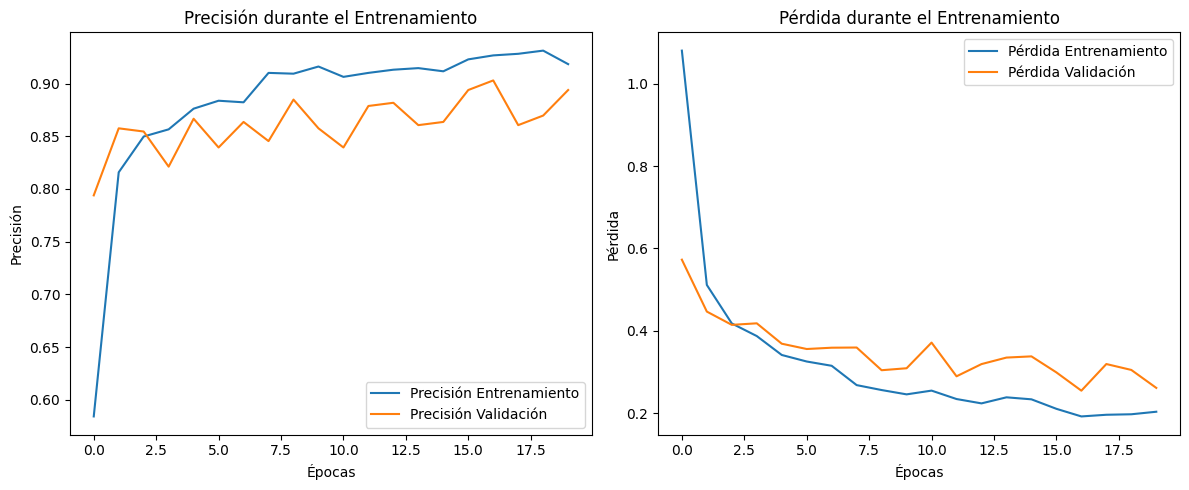

Saving fresa.jpg to fresa.jpg


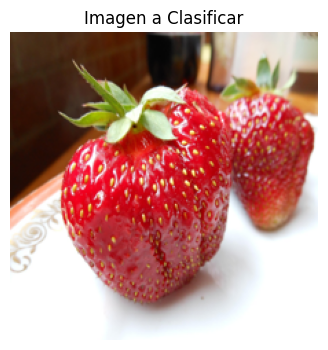

1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
Predicción: fresh_strawberries_done (Confianza: 0.8486)


In [ ]:
# ===============================================
# Clasificación de Imágenes de Frutas usando MobileNetV2
# ===============================================

import numpy as np
import matplotlib.pyplot as plt
import pathlib
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Verificar GPU
print("GPUs disponibles:", tf.config.list_physical_devices('GPU'))

# ----------------------------
# 1. Configuración del Dataset
# ----------------------------
data_dir = pathlib.Path('/content/fruits_dataset')  #Dataset
IMAGE_WIDTH = 224   # MobileNetV2 recomienda 224x224
IMAGE_HEIGHT = 224
IMAGE_CHANNELS = 3
BATCH_SIZE = 16
EPOCHS = 20

# Obtener todas las clases automáticamente
frutas = [f.name for f in data_dir.iterdir() if f.is_dir()]
num_classes = len(frutas)
print(f"Clases encontradas: {frutas} (Total: {num_classes})")

# ----------------------------
# 2. Data Generators
# ----------------------------
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.7, 1.3],
    fill_mode='nearest',
    validation_split=0.2
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

# ----------------------------
# 3. Transfer Learning: MobileNetV2
# ----------------------------
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False  # Congelar pesos iniciales

inputs = Input(shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS))
x = base_model(inputs, training=False)
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
outputs = Dense(num_classes, activation='softmax')(x)

model = Model(inputs, outputs)

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
)

model.summary()

# ----------------------------
# 4. Callbacks
# ----------------------------
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

callbacks = [early_stop, reduce_lr]

# ----------------------------
# 5. Entrenamiento
# ----------------------------
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=EPOCHS,
    callbacks=callbacks
)

# ----------------------------
# 6. Evaluación en Test
# ----------------------------
test_generator = test_datagen.flow_from_directory(
    data_dir,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

resultado = model.evaluate(test_generator)
print(f"\nPérdida test: {resultado[0]:.4f}")
print(f"Precisión test: {resultado[1]:.4f}")
print(f"Precisión (macro): {resultado[2]:.4f}")
print(f"Recall (macro): {resultado[3]:.4f}")

# ----------------------------
# 7. Gráficas de Entrenamiento
# ----------------------------
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Precisión Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión Validación')
plt.title('Precisión durante el Entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Pérdida Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida Validación')
plt.title('Pérdida durante el Entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.tight_layout()
plt.show()

# ----------------------------
# 8. Subir y predecir imagen en Colab
# ----------------------------
from google.colab import files
import PIL

uploaded = files.upload()
ruta_imagen = list(uploaded.keys())[0]

imagen = PIL.Image.open(ruta_imagen).convert("RGB").resize((IMAGE_WIDTH, IMAGE_HEIGHT))
imagen_array = np.array(imagen).reshape(1, IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS) / 255.0

plt.figure(figsize=(4,4))
plt.imshow(imagen)
plt.title("Imagen a Clasificar")
plt.axis('off')
plt.show()

pred = model.predict(imagen_array)
pred_idx = np.argmax(pred)
pred_class = frutas[pred_idx]
confidence = pred[0][pred_idx]

print(f"Predicción: {pred_class} (Confianza: {confidence:.4f})")


In [ ]:
# ----------------------------
# 9. Guardar Modelo
# ----------------------------
model.save('modelo_frutas_cnn.h5')
print("Modelo guardado como 'modelo_frutas_cnn.h5'")

Modelo guardado como 'modelo_frutas_cnn.h5'
